In [1]:
import time
import torch.optim
import torch.nn.functional as F
import torch.nn as nn
from torchvision import models
from datasets.dataset import CUBDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
from torchvision import transforms
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot
from numpy import unravel_index

In [2]:
learning_rate = 1e-3
input_channels = 1
output_features = 6
epoch = 1
save_model_name = 'models/pretrained.pth'

In [3]:
trainset = CUBDataset()
trainloader = DataLoader(dataset=trainset, batch_size=10, shuffle=True)
testset = CUBDataset(is_test = True)
testloader = DataLoader(dataset=testset, batch_size=10, shuffle=True)

In [4]:
vgg19 = torch.hub.load('pytorch/vision:v0.9.0', 'vgg19', pretrained=True)

Using cache found in C:\Users\Valdone/.cache\torch\hub\pytorch_vision_v0.9.0


# Standard Vgg19

(3, 448, 448)
(448, 448, 3)


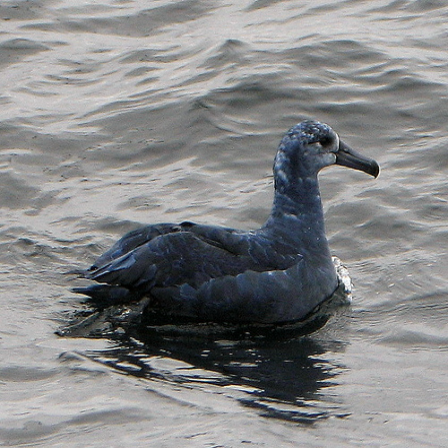

In [5]:
img , label = trainset[120]
print(img.shape)
print(img.transpose(1,2,0).shape)
baseimage = Image.fromarray(img.transpose(1,2,0).astype(np.uint8))
baseimage


In [6]:
img = transforms.ToTensor()(img)
img = img.permute(1,2,0)
mean, std = img.mean([1,2]), img.std([1,2])
#print("Mean:", mean, "\nStd:", std)
#print("image shape:", img.shape)
#img = transforms.Normalize(mean, std)(img)
#/255 -> Vgg19 Normalization
img = img/255
img = transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])(img) 
img = img.unsqueeze(0)
print(img.shape)

torch.Size([1, 3, 448, 448])


In [7]:
vgg19(img)

tensor([[ 7.1337e-01,  3.9988e-01,  2.8979e+00,  2.6823e+00,  3.6596e+00,
          2.1939e+00,  3.8124e+00,  2.9022e+00,  3.3981e+00,  2.1457e+00,
          2.1134e+00,  2.0579e+00,  2.4550e+00,  4.0178e+00,  2.5801e+00,
          2.6837e+00,  2.4602e+00,  3.5162e+00,  4.4997e+00,  1.4659e+00,
          8.1547e+00,  3.6398e+00,  3.9836e+00,  5.2737e+00, -6.0998e-01,
          7.8509e-01,  3.4885e-01, -4.2904e-01,  3.7852e-01,  1.4568e+00,
          2.3178e+00, -9.2124e-01,  1.0746e+00,  2.9441e+00,  4.0924e+00,
          4.1876e+00,  3.8212e+00,  1.4862e-01, -1.3308e+00,  1.5519e+00,
         -5.5565e-01,  3.0986e-01,  9.8478e-01, -1.0845e+00, -4.4406e-02,
          4.8909e-01, -1.4332e+00, -1.8550e+00,  1.3632e+00,  3.0757e+00,
          2.8906e+00,  2.8694e-01,  8.0565e-03,  2.3019e+00,  1.6675e+00,
          1.0971e-01, -4.8877e-01,  2.8765e-01,  4.6988e+00,  8.6493e-01,
          7.6501e-01, -8.0822e-01,  1.3164e+00,  1.8452e+00,  4.6660e-01,
          3.4197e+00,  3.7152e-01,  7.

In [8]:
output = nn.Softmax(dim=1)(vgg19(img))

In [9]:
with open("classes_vgg19.txt","r") as f:
    classes = f.read().split("\n")

In [10]:
max_o = 0
highscore = None
for i, o in enumerate(output[0]):
    if max_o < o:
        highscore = i
        max_o = o

print(highscore,classes[highscore])

137 American coot


In [11]:
channels = vgg19.features(img)
channels = channels.detach().numpy()

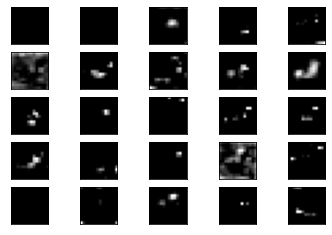

In [12]:
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(channels[0, ix-1, :, :], cmap='gray')
        ix += 1
# show the figure
pyplot.show()


# Formula 1: determine t

In [13]:
from collections import Counter
from itertools import chain

In [18]:
t = list()
for channel in channels[0]:
    #print(np.max(channel))
    t.append(unravel_index(channel.argmax(), channel.shape))

In [35]:
x,y = zip(*t)

In [39]:
x_list = list()
y_list = list()
for x,y in t:
    x_list.append(x)
    y_list.append(y)
  

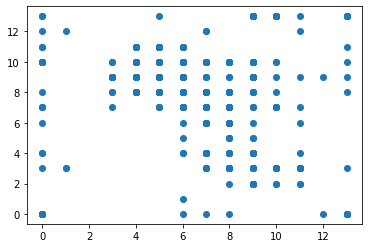

In [40]:
plt.scatter(x_list,y_list)

In [19]:
counter = Counter(t)

In [20]:
part_xy = counter.most_common(20)[1:]

In [21]:
part_xy

[((6, 10), 25),
 ((5, 10), 24),
 ((6, 9), 22),
 ((7, 7), 15),
 ((6, 8), 14),
 ((4, 8), 14),
 ((8, 8), 14),
 ((8, 3), 13),
 ((4, 10), 13),
 ((5, 9), 12),
 ((5, 8), 12),
 ((6, 7), 12),
 ((8, 7), 11),
 ((3, 9), 11),
 ((9, 9), 10),
 ((9, 10), 9),
 ((10, 13), 9),
 ((8, 10), 9),
 ((5, 11), 9)]

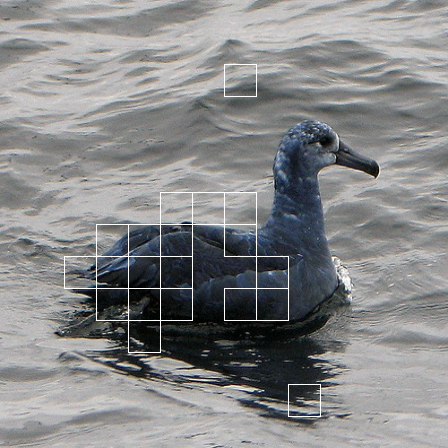

In [22]:
for xy,_ in part_xy:
    x,y = xy
    i = ImageDraw.Draw(baseimage).rectangle([(x-1)*32,(y-1)*32,x*32,y*32])
baseimage

In [235]:

i = ImageDraw.Draw(baseimage)
i.rectangle([1,1,32,32])

In [238]:
i = 0

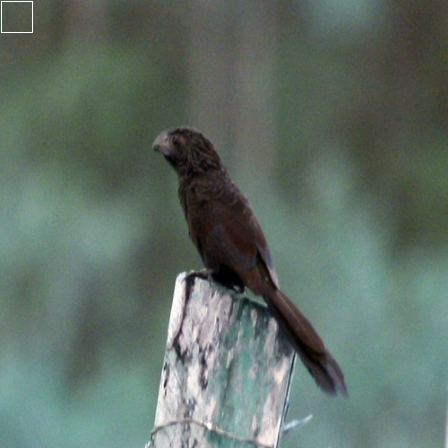

In [239]:
baseimage

# Clustering

In [ ]:
class Clustering(nn.Module):
    
    def __init__(self):
        super(Clustering, self).__init__()
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        

In [24]:
t_flatten = [i for xy in t for i in xy]

In [30]:
t_flatten= torch.Tensor(t_flatten)

In [32]:
t_flatten.shape

torch.Size([1024])

In [34]:
vgg19.fc1 = nn.Linear(in_features=1024, out_features=512, bias=True)
vgg19.fc2 = nn.Linear(in_features=512, out_features=512, bias=True)
#vgg19.fc(torch.Tensor(t).permute(1,0))
vgg19.fc2(vgg19.fc1(t_flatten))

tensor([ 7.6655,  1.2965, -2.0605,  3.2623,  2.8285, -1.4877, -4.0841, -3.7696,
         2.5150,  1.2638,  0.6534,  0.7079, -0.7683,  0.1847, -3.8438,  3.3279,
         5.9052,  3.0172, -2.8025,  0.5104, -1.6640, -0.0662, -0.3424,  1.9001,
         0.3512, -0.2039, -3.6479, -2.5663,  1.6013, -3.7243,  1.2742, -0.6620,
        -2.5811,  0.1784,  1.0887, -2.3322, -1.1840, -1.0496, -1.1118, -0.9285,
         0.8539,  0.4576, -0.7151,  2.1064, -0.4160,  4.3622, -1.7347,  3.0396,
        -5.9833,  0.9586, -2.6237, -1.5037,  0.8385, -2.9848, -2.5489,  0.9048,
         2.7866, -0.2091, -4.1651, -1.7056, -2.6948,  3.5283, -0.7201, -3.7217,
         1.8343, -3.6964,  0.1968,  1.6312, -0.0708, -1.2804,  2.2019, -1.6460,
        -2.7039, -3.1139,  5.5155, -1.2552, -2.4519, -3.6655, -4.5818, -3.7104,
        -1.6767,  0.1208, -1.6926, -0.6381,  2.0362,  0.9119,  1.9204, -1.0139,
         3.9791, -1.3982, -0.7539, -0.4816,  3.3635, -3.8518, -0.1185,  0.5328,
        -3.8287, -2.6550, -1.2811, -0.56

['l', 'a', 'l', 'a', 'l', 'a']

['lalala']

In [293]:
vgg19.eval

<bound method Module.eval of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_siz

In [10]:
class Part(nn.Module):

    def __init__(self):
        super(Part, self).__init__()
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 256)

    def forward(self, x):
        conv_matrix = torch.clone(x)
        conv_matrix = conv_matrix.reshape(conv_matrix.size(0), 512, 1, 784) #512 = patterns; 784 = 28x28 pattern w x h
        conv_matrix = conv_matrix.transpose(1, 3)
        x = F.avg_pool2d(x, kernel_size=28, stride=28)
        x = x.view(x.size(0), -1)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        x = torch.sigmoid(x).unsqueeze(1).unsqueeze(1)
        x = F.interpolate(x, (1, 784), mode='bilinear', align_corners=True)
        x = x.squeeze(1).squeeze(1).unsqueeze(2).unsqueeze(3)
        x = x * conv_matrix
        x = F.avg_pool2d(x, kernel_size=(1, 512), stride=512)
        x = x * 0.1
        x = F.softmax(x, dim=1)
        x = torch.exp(x)
        x = x + 1
        x = torch.log(x)
        x = x * 4
        x = x.squeeze(2).squeeze(2)
        return x.reshape(x.size(0), 28, 28)

In [11]:
class Loss(nn.Module):

    def __init__(self):
        super(Loss, self).__init__()

    def forward(self, tensor):
        loss_sum = torch.zeros(1).cuda()
        indexes = Loss.get_max_index(tensor)
        for i in range(len(indexes)):
            max_x, max_y = indexes[i]
            for j in range(tensor.size(1)):
                for k in range(tensor.size(2)):
                    loss_sum += ((max_x - j) * (max_x - j) + (max_y - k) * (max_y - k)) * tensor[i, j, k]
        return loss_sum

    @staticmethod
    def get_max_index(tensor):
        shape = tensor.shape
        indexes = []
        for i in range(shape[0]):
            mx = tensor[i, 0, 0]
            x, y = 0, 0
            for j in range(shape[1]):
                for k in range(shape[2]):
                    if tensor[i, j, k] > mx:
                        mx = tensor[i, j, k]
                        x, y = j, k
            indexes.append([x, y])
        return indexes

In [212]:
part = Part()

In [213]:
loss_fn = Loss()

In [214]:
optimizer = torch.optim.Adam(part.parameters(), lr = learning_rate)

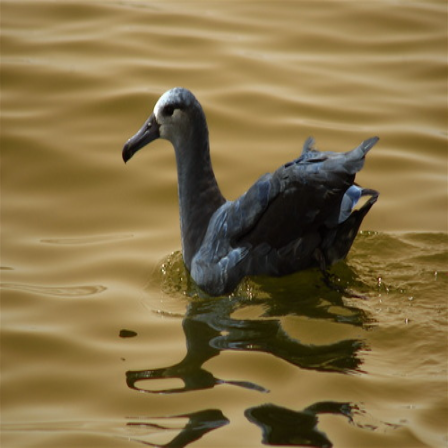

In [24]:
img , label = trainset[55]
Image.fromarray(img.transpose(1,2,0).astype(np.uint8))

In [25]:
img = transforms.ToTensor()(img)
img = img.permute(1,2,0)
print(img.shape)
mean, std = img.mean([1,2]), img.std([1,2])
print("Mean:", mean, "\nStd:", std)
img = img/255
img = transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])(img)
img = img.unsqueeze(0)
print("image shape:", img.shape)

torch.Size([3, 448, 448])
Mean: tensor([132.5596, 112.3001,  69.2692]) 
Std: tensor([48.3230, 41.1582, 33.2399])
image shape: torch.Size([1, 3, 448, 448])


In [26]:
channels = vgg19.features[0:36](img)

In [ ]:
print("channel shape:", channels.shape)
output = part(channels)
print("output shape:", output.shape)
optimizer.zero_grad()
loss = loss_fn(output)
loss.backward()
optimizer.step()
print("hi")

In [27]:
part_model = torch.load(save_model_name)

In [28]:
output = part_model(channels)
x = output.permute(1,2,0).detach().numpy()
print(x.shape)
print(type(x))
print(np.stack((x,x,x),axis=2).squeeze(-1).shape)
Image.fromarray(np.stack((x,x,x),axis=2).squeeze(-1).astype(np.uint8))


torch.Size([1, 28, 28])
(28, 28, 1)
<class 'numpy.ndarray'>
(28, 28, 3)


In [254]:
epoch = 10
for epoch_number in range(epoch):
    running_loss, count, acc = 0., 0, 0.
    for batch, label in trainloader:
        for img in batch:
            t = time.time()
            #print(img.shape)
            img = img/255
            img = transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])(img)
            img = img.unsqueeze(0)
            #print("image shape:", img.shape)
            channels = vgg19.features[0:36](img)
            #print("channel shape:", channels.shape)
            output = part(channels)
            #print("output shape:", output.shape)
            optimizer.zero_grad()
            loss = loss_fn(output)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            count += img.size(0)
            #print(time.time() - t)
        print(epoch_number, count, running_loss, Loss.get_max_index(output))

           


0 10 3968481.8125 [[9, 18]]
0 20 7575797.4375 [[5, 9]]
0 30 11818419.3125 [[4, 11]]
0 40 15634601.09375 [[9, 9]]
0 50 18993883.78125 [[8, 14]]
0 60 22918851.40625 [[19, 18]]
0 70 26238973.09375 [[14, 17]]
0 80 29820179.09375 [[5, 17]]
0 90 33188166.3125 [[12, 8]]
0 100 36804183.9375 [[9, 16]]
0 110 40341877.0625 [[15, 20]]
0 120 44149357.09375 [[12, 17]]
0 130 47935079.15625 [[13, 18]]
0 140 51707746.4375 [[13, 12]]
0 150 55267197.0625 [[12, 12]]
0 160 58517695.8125 [[5, 14]]
0 170 62225090.5625 [[9, 21]]
0 180 65893324.625 [[11, 15]]
0 190 70001049.75 [[5, 11]]
0 198 72833814.1875 [[15, 12]]
1 10 3898859.84375 [[10, 9]]
1 20 7728096.46875 [[14, 14]]
1 30 11278840.84375 [[9, 17]]
1 40 14934021.46875 [[6, 16]]
1 50 18589201.9375 [[10, 15]]
1 60 22636007.40625 [[7, 16]]
1 70 26003994.03125 [[14, 12]]
1 80 29506874.9375 [[16, 17]]
1 90 33035865.15625 [[13, 17]]
1 100 36965185.71875 [[15, 17]]
1 110 40450659.6875 [[7, 19]]
1 120 44349520.8125 [[10, 14]]
1 130 48000350.1875 [[14, 20]]
1 140

In [256]:
torch.save(part, save_model_name)